In [334]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.stats import norm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [335]:
data = pd.read_excel('DCOILBRENTEU.xlsx', index_col = 'DATE')

In [336]:
# simple moving average for 10 days
for i in range(0,data.shape[0]-10):
    data.loc[data.index[i+10],'SMA_10'] = np.round(((data.iloc[i,0]+ data.iloc[i+1,0] +data.iloc[i+2,0]+data.iloc[i+3,0]+data.iloc[i+4,0]+data.iloc[i+5,0]+data.iloc[i+6,0]+data.iloc[i+7,0]+data.iloc[i+8,0]+data.iloc[i+9,0])/10),1)

In [337]:
data.iloc[9:20,:]             # df.iloc[row,columns]    ':' means everything, '4:8' means from 4 to 8 

,DCOILBRENTEU,SMA_10
DATE,,
2014-11-17,76.86,NaN
2014-11-18,77.23,80.7
2014-11-19,77.21,80.2
2014-11-20,77.61,79.6
2014-11-21,79.20,79.2
2014-11-24,79.62,78.8
2014-11-25,77.62,78.4
2014-11-26,77.39,78.1
2014-11-27,77.39,77.8


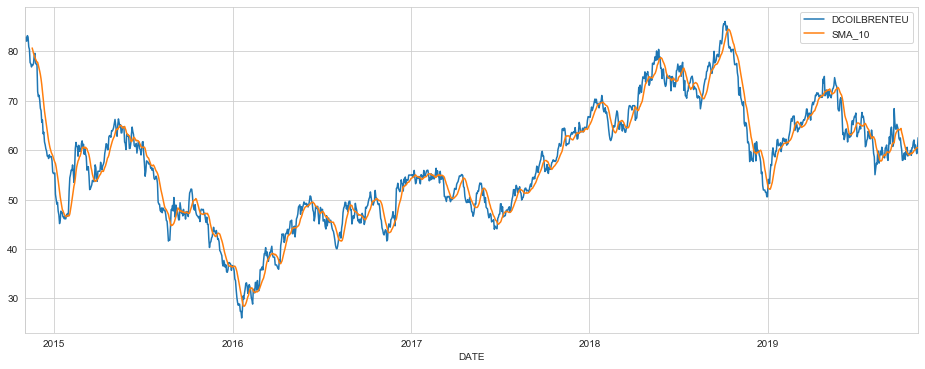

In [338]:
data.plot(figsize=(16, 6));

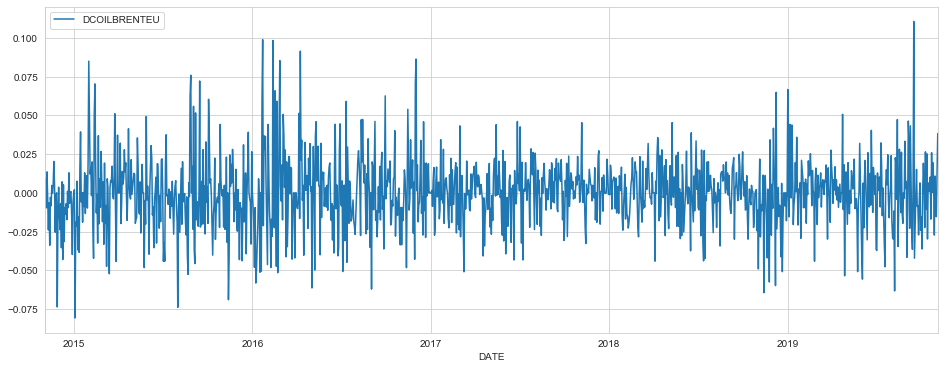

In [339]:
log_returns.plot(figsize = (16, 6))

In [340]:
data = data.drop(['SMA_10'], axis=1)

In [341]:
log_returns = np.log(1 + data.pct_change()) # which is same as ln (P_t+1/P_t)

In [342]:
1 + data.pct_change()

,DCOILBRENTEU
DATE,
2014-11-04,NaN
2014-11-05,1.009255
2014-11-06,0.990347
2014-11-07,1.013645
2014-11-10,0.996394
...,...
2019-10-29,1.010929
2019-10-30,0.986405
2019-10-31,0.984723


In [343]:
u = log_returns.mean()
u

DCOILBRENTEU   -0.000209
dtype: float64

In [344]:
var = log_returns.var()
var

DCOILBRENTEU    0.000503
dtype: float64

In [345]:
drift = u - (0.5 * var)
drift

DCOILBRENTEU   -0.000461
dtype: float64

In [346]:
stdev = log_returns.std()
stdev

DCOILBRENTEU    0.022434
dtype: float64

In [347]:
type(drift)

pandas.core.series.Series

In [348]:
type(stdev)

pandas.core.series.Series

In [349]:
drift

DCOILBRENTEU   -0.000461
dtype: float64

In [350]:
np.array(drift)

array([-0.00046078])

In [351]:
drift.values

array([-0.00046078])

In [352]:
stdev.values

array([0.02243449])

In [353]:
norm.ppf(0.95)

1.6448536269514722

In [354]:
x = np.random.rand(10, 2)                          # just an array of 10 rows and 2 columns of random values
x

array([[0.88204567, 0.77740699],
       [0.09012878, 0.91748823],
       [0.23695864, 0.85785002],
       [0.58358751, 0.87487191],
       [0.8090951 , 0.43446873],
       [0.5731427 , 0.60498098],
       [0.0705894 , 0.50030971],
       [0.48257576, 0.59910033],
       [0.81553078, 0.02174546],
       [0.76703632, 0.06223092]])

In [355]:
norm.ppf(x)                                     # percent point function which converts that array into standard mormal distribution x-axis

array([[ 1.18527519e+00,  7.63465184e-01],
       [-1.33996245e+00,  1.38837286e+00],
       [-7.16119952e-01,  1.07070976e+00],
       [ 2.11079835e-01,  1.14972735e+00],
       [ 8.74566547e-01, -1.65008286e-01],
       [ 1.84380971e-01,  2.66261219e-01],
       [-1.47141545e+00,  7.76327553e-04],
       [-4.36899960e-02,  2.51019100e-01],
       [ 8.98463594e-01, -2.01896449e+00],
       [ 7.29121461e-01, -1.53631219e+00]])

In [356]:
Z = norm.ppf(np.random.rand(10,2))  #x axis projection of the standard normal distribution values SND
Z

array([[ 0.92696499,  2.26303308],
       [-0.41502744, -0.70586811],
       [-0.2995345 , -0.82926196],
       [-0.30219042,  0.40855089],
       [ 0.94954693,  0.80480454],
       [ 0.15162186,  0.08187755],
       [-1.04150112, -1.28578535],
       [ 1.21203102,  0.67006773],
       [-1.05656708,  0.25813753],
       [ 2.26197346, -0.004592  ]])

In [357]:
t_intervals = 1825                # after how many days do you want oil price 
iterations = 1000                # number of random steps

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))   # e^(drift+ stdev*(x axis projection of SND))

In [318]:
#daily_returns

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [358]:
S0 = data.iloc[-1]                     # last value or the latest price of the oil
#S0

In [359]:
price_list = np.zeros_like(daily_returns)      #returns a zeros array of shape daily returns

In [151]:
#price_list

In [152]:
#price_list[0]

In [360]:
price_list[0] = S0                             #filling the first row with the latest oil price
price_list

array([[62.52, 62.52, 62.52, ..., 62.52, 62.52, 62.52],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [361]:
ending_price_points = []                        #ending price of each simulation array
for t in range(1, t_intervals):                 # loop for number of days to run
    price_list[t] = price_list[t - 1] * daily_returns[t]       # random walk and list update => price* daily returns
ending_price_points.append(price_list[-1])      #update the list of final simulation values for histogram

In [155]:
#ending_price_points

In [156]:
#price_list

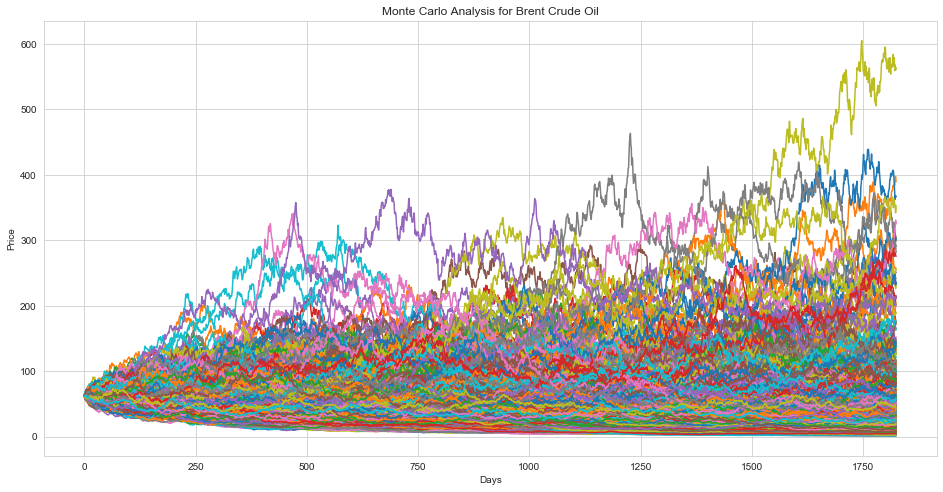

In [362]:
plt.figure(figsize=(16,8))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Brent Crude Oil')
plt.plot(price_list);


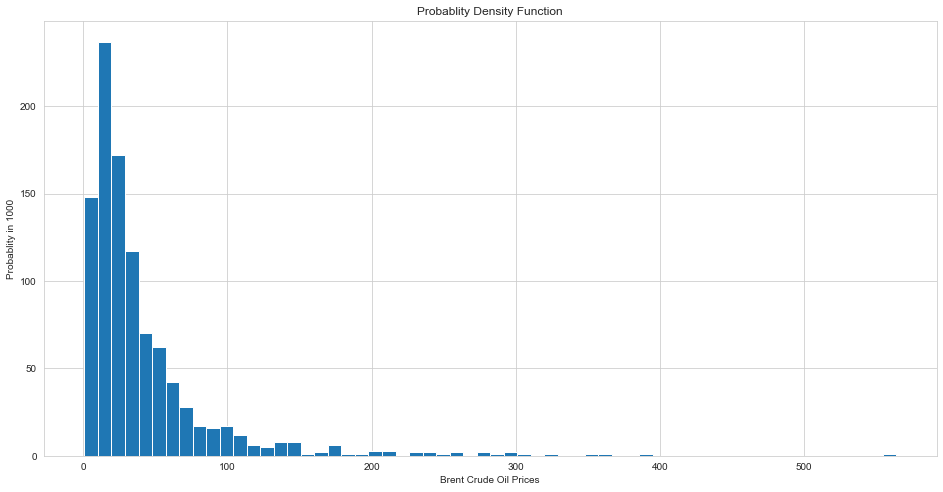

In [363]:
plt.figure(figsize=(16,8))
plt.hist(ending_price_points,bins=60)
plt.title('Probablity Density Function')
plt.xlabel('Brent Crude Oil Prices')
plt.ylabel('Probablity in 1000')
plt.show()

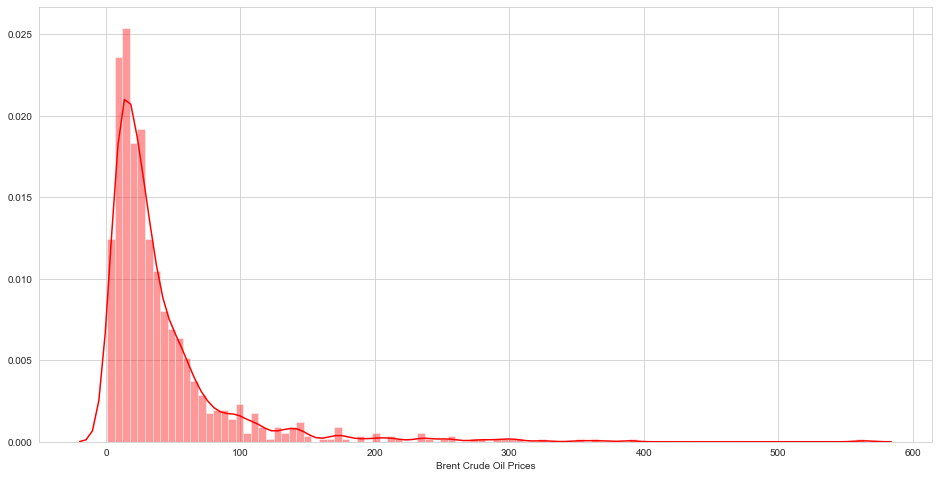

In [364]:
plt.figure(figsize=(16,8))
sns.distplot(ending_price_points,bins=100,color='red',axlabel="Brent Crude Oil Prices")

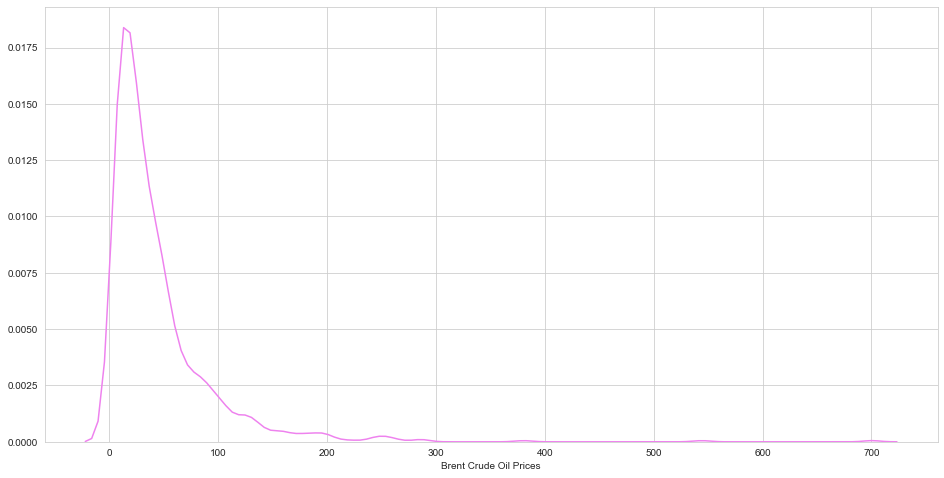

In [326]:
plt.figure(figsize=(16,8))
ax = sns.distplot(ending_price_points, rug=False, hist=False,color='violet', axlabel="Brent Crude Oil Prices")

In [365]:
expected_ending_price_point = round(np.mean(ending_price_points),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  41.33


In [366]:
time_elapsed = (data.index[-1] - data.index[0]).days            #last day price - first day price

In [367]:
price_ratio = (data['DCOILBRENTEU'][-1] / data['DCOILBRENTEU'][1])    
inverse_number_of_years = 365.0 / time_elapsed                        
cagr = price_ratio ** inverse_number_of_years - 1            #CAGR=((end price/first price)^1/no of years-1) three lines to run this

In [368]:
population_mean = (cagr+1) * data['DCOILBRENTEU'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  41.33
Population Mean:  59.09
Percent Difference :  30.06 %


In [369]:
top_five = np.percentile(ending_price_points,100-5)
bottom_five = np.percentile(ending_price_points,5);
print ("Top 5% : ", str(round(top_five,2)))
print ("Bottom 5% : ", str(round(bottom_five,2)))

Top 5% :  132.46
Bottom 5% :  5.51


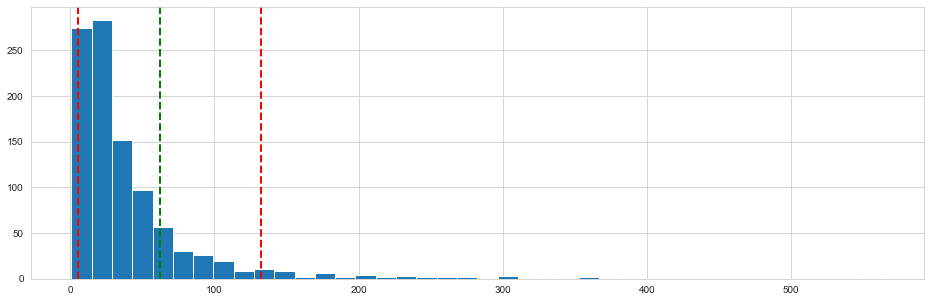

In [370]:
plt.figure(figsize=(16,5))
plt.hist(ending_price_points,bins=40)
plt.axvline(top_five,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_five,color='r',linestyle='dashed',linewidth=2)
plt.axvline(data['DCOILBRENTEU'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()